In [77]:
import wget 
import matplotlib.pyplot as plt
import urllib.request
import re
import numpy as np
import matplotlib as mpl

In [105]:
nircam_filters =['F090W','F115W','F150W','F182W','F200W','F210M','F277W','F356W','F410M','F444W','F300M','F335M','F250M','F430M','F460M','F480M']
miri_filters = ['F1000W','F1280W','F1500W','F1800W','F2100W','F560W','F770W']
wfc3_ir = ['F105W','F125W','F140W','F160W','F110W']
acs_wfc = ['F435W','F606W','F775W','F814W','F625W','F555W']
wfc3_uvis=['F275W','F606W','F350LP','F225W','F390W']

In [17]:
for filt in nircam_filters:
    url =f"http://svo2.cab.inta-csic.es/theory/fps/getdata.php?format=ascii&id=JWST/NIRCam.{filt}"
    wget.download(url)
for filt in miri_filters:
    url =f"http://svo2.cab.inta-csic.es/theory/fps/getdata.php?format=ascii&id=JWST/MIRI.{filt}"
    wget.download(url)
for filt in wfc3_ir:
    url =f"http://svo2.cab.inta-csic.es/theory/fps/getdata.php?format=ascii&id=HST/WFC3_IR.{filt}"
    wget.download(url)
for filt in acs_wfc:
    url =f"http://svo2.cab.inta-csic.es/theory/fps/getdata.php?format=ascii&id=HST/ACS_WFC.{filt}"
    wget.download(url)
for filt in wfc3_uvis:
    url =f"http://svo2.cab.inta-csic.es/theory/fps/getdata.php?format=ascii&id=HST/WFC3_UVIS1.{filt}"
    wget.download(url)

-1 / unknown..........................................................................] 6967 / 6967

In [117]:
nircam=[]
cmap = cm = plt.get_cmap('Blues') 
for i in np.linspace(0,1,len(nircam_filters)): 
    nircam.append(cmap(i))
    
wfc3_ir_colours=[]
cmap = cm = plt.get_cmap('Reds') 
for i in np.linspace(0,1,len(wfc3_ir)): 
    wfc3_ir_colours.append(cmap(i))
    
miri=[]
cmap = cm = plt.get_cmap('Purples') 
for i in np.linspace(0,1,len(miri_filters)): 
    miri.append(cmap(i))
    
acs_wfc_colours=[]
cmap = cm = plt.get_cmap('Greens') 
for i in np.linspace(0,1,len(acs_wfc)): 
    acs_wfc_colours.append(cmap(i))

    
wfc3_uvis_colours=[]
cmap = cm = plt.get_cmap('Oranges') 
for i in np.linspace(0,1,len(wfc3_uvis)): 
    wfc3_uvis_colours.append(cmap(i))


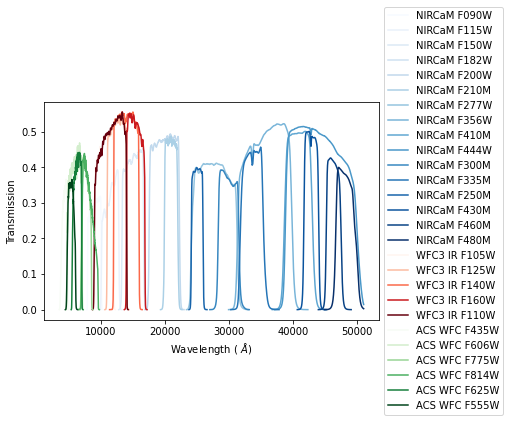

In [135]:

for filt,i in zip(nircam_filters,nircam):
    file = open(f'NIRCam.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
    plt.plot(x,y,label=f'NIRCaM {filt}',color=i)
   
        
for filt,i in zip(wfc3_ir,wfc3_ir_colours):
    file = open(f'WFC3_IR.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
    plt.plot(x,y,label=f'WFC3 IR {filt}',color=i)
    

    
for filt,i in zip(acs_wfc,acs_wfc_colours):
    file = open(f'ACS_WFC.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        #print(tokens[0])
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
    plt.plot(x,y,label=f'ACS WFC {filt}',color=i)
    


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Wavelength ( $\AA$)')
plt.ylabel('Transmission')
plt.savefig('MPhys/wavelength_plots/nircam_wfc3IR_acswfc.png',bbox_inches='tight' )
plt.show()    

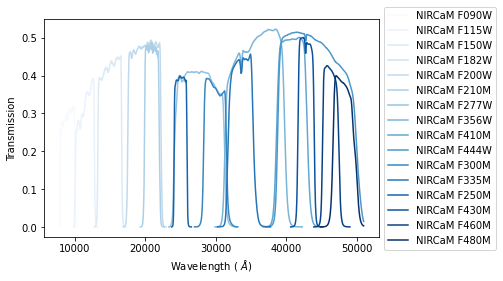

In [136]:
#nircam only 
for filt,i in zip(nircam_filters,nircam):
    file = open(f'NIRCam.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        #print(tokens[0])
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
    plt.plot(x,y,label=f'NIRCaM {filt}',color=i)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Wavelength ( $\AA$)')
plt.ylabel('Transmission')
plt.savefig('MPhys/wavelength_plots/nircam.png',bbox_inches='tight')

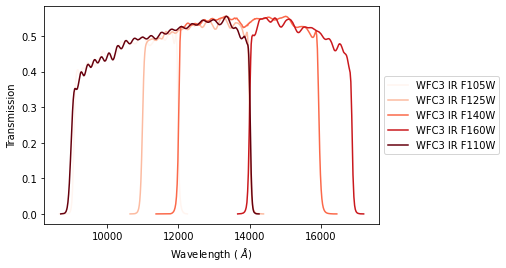

In [137]:
#wfc3_ir only 
for filt,i in zip(wfc3_ir,wfc3_ir_colours):
    file = open(f'WFC3_IR.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
    plt.plot(x,y,label=f'WFC3 IR {filt}',color=i)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Wavelength ( $\AA$)')
plt.ylabel('Transmission')
plt.savefig('MPhys/wavelength_plots/wfc3ir.png',bbox_inches='tight')

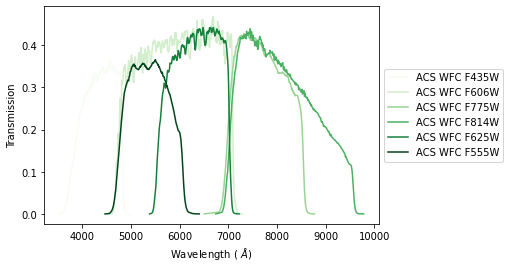

In [138]:
#wfc_acs only 
for filt,i in zip(acs_wfc,acs_wfc_colours):
    file = open(f'ACS_WFC.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        #print(tokens[0])
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
    plt.plot(x,y,label=f'ACS WFC {filt}',color=i)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Wavelength ( $\AA$)')
plt.ylabel('Transmission')
plt.savefig('MPhys/wavelength_plots/acs_wfc.png',bbox_inches='tight')

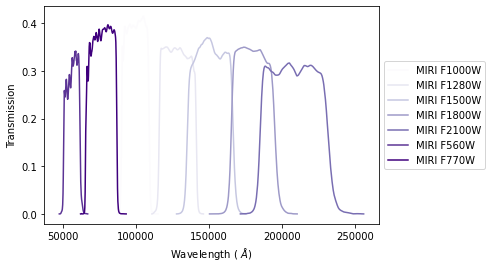

In [139]:
#miri only 
for filt,i in zip(miri_filters,miri):
    file = open(f'MIRI.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        #print(tokens[0])
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
    plt.plot(x,y,label=f'MIRI {filt}',color=i)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Wavelength ( $\AA$)')
plt.ylabel('Transmission')
plt.savefig('MPhys/wavelength_plots/miri.png',bbox_inches='tight')

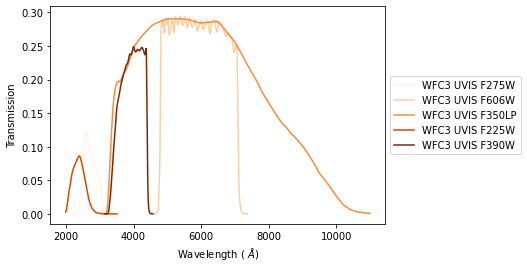

In [140]:
#wfc3_uvis only 
for filt,i in zip(wfc3_uvis,wfc3_uvis_colours):
    file = open(f'WFC3_UVIS1.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        #print(tokens[0])
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
        
   
    plt.plot(x,y,label=f'WFC3 UVIS {filt}',color=i)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Wavelength ( $\AA$)')
plt.ylabel('Transmission')
plt.savefig('MPhys/wavelength_plots/wfc_uvis.png',bbox_inches='tight')